In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots

# Review of Tables

## Basics

- what is a CSV?
- read the CSV 'data/skyscrapers.csv' using `read_table()`
- display a table using `show()`
- sort a table using `sort()` ascending/descending
- select column(s) using `select()`
- drop column(s) using `drop()`

## Subsetting:
- subset rows using `where()`
    - skyscrapers in LA
    - skyscrapers in LA that were completed in 1971
- subset rows using `where()` and [predicates](http://www.data8.org/datascience/reference-nb/datascience-reference.html#Table.where-Predicates)
    - skyscrapers that were completed after 2014
    - skyscrapers that were completed in the 1990s
    
> some predicates: 
> - `are.equal_to()` 
> - `are.above()`,`are.below()`
> - `are.above_or_equal_to()`, `are.below_or_equal_to()`, 
> - `are.between()`, `are.between_or_equal_to()`, 

- skyscrapers that are a 'Tower' (using `are.containing()`) 
- skyscrapers that are in Chicago or Houston  (using `are.contained_in()`)

In [2]:
skyscrapers = Table().read_table('data/skyscrapers.csv')

In [3]:
skyscrapers.where('completed', are.above(2014))

name,material,city,height,completed
432 Park Avenue,concrete,New York City,425.5,2015
Sky,concrete,New York City,206,2015
Mansions at Acqualina,concrete,Sunny Isles Beach,196,2015


In [4]:
skyscrapers.where('name', are.containing('Tower'))

name,material,city,height,completed
Willis Tower,steel,Chicago,442.14,1974
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Bank of America Tower,composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
WITI TV Tower,steel,Shorewood,329,1962
New York Times Tower,steel,New York City,318.77,2007
U.S. Bank Tower,steel,Los Angeles,310.29,1990
The Franklin - North Tower,composite,Chicago,306.94,1989
JPMorgan Chase Tower,composite,Houston,305.41,1982
Key Tower,composite,Cleveland,288.65,1991


In [6]:
skyscrapers.where('city', are.contained_in(('Houston', 'Chicago')))

name,material,city,height,completed
Willis Tower,steel,Chicago,442.14,1974
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
The Franklin - North Tower,composite,Chicago,306.94,1989
JPMorgan Chase Tower,composite,Houston,305.41,1982
Two Prudential Plaza,concrete,Chicago,303.28,1990
Wells Fargo Plaza,steel,Houston,302.37,1983
311 South Wacker Drive,concrete,Chicago,292.92,1990
Williams Tower,steel,Houston,274.63,1982


## Visualizations
1. read the csv `data/movies_by_year.csv`
1. Plot the number of movies over time using `plot()`
1. Plot the number of movies vs the total gross using `scatter()`
    - add a trendline
    - try adding year as label

In [9]:
movies = Table().read_table('data/movies_by_year.csv')
movies

Year,Total Gross,Number of Movies,#1 Movie
2022,7373451042,449,Top Gun: Maverick
2021,4861041470,406,Spider-Man: No Way Home
2020,1426005959,334,Bad Boys for Life
2019,11443939610,792,Avengers: Endgame
2018,11610362001,872,Black Panther
2017,11127252460,742,Star Wars: Episode VIII - The Last Jedi
2016,11373700570,737,Rogue One: A Star Wars Story
2015,11098999414,707,Star Wars: Episode VII - The Force Awakens
2014,10436810102,708,American Sniper
2013,10955270663,686,The Hunger Games: Catching Fire


In [13]:
movies.scatter?

Signature:
movies.scatter(
    column_for_x,
    select=None,
    overlay=True,
    fit_line=False,
    group=None,
    labels=None,
    sizes=None,
    width=None,
    height=None,
    s=20,
    **vargs,
)
Docstring:
Creates scatterplots, optionally adding a line of best fit. Redirects to ``Table#iscatter``
if interactive plots are enabled with ``Table#interactive_plots``

args:
    ``column_for_x`` (``str``): the column to use for the x-axis values
        and label of the scatter plots.

kwargs:
    ``overlay`` (``bool``): if true, creates a chart with one color
        per data column; if false, each plot will be displayed separately.

    ``fit_line`` (``bool``): draw a line of best fit for each set of points.

    ``vargs``: additional arguments that get passed into `plt.scatter`.
        see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
        for additional arguments that can be passed into vargs. these
        include: `marker` and `norm`, to name a coup

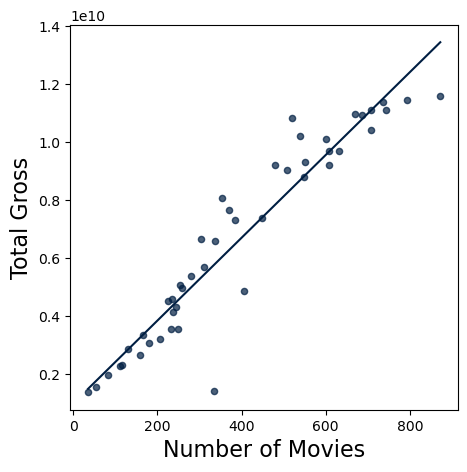

In [16]:
movies.scatter('Number of Movies', 'Total Gross', fit_line=True)

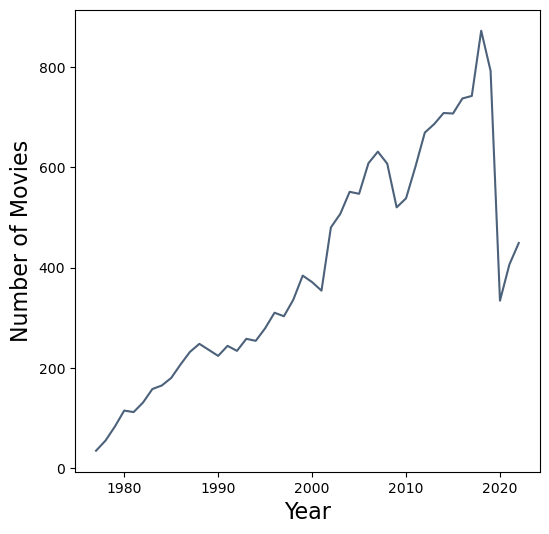

In [10]:
movies.plot('Year', 'Number of Movies')

# Numbers 
Python has two number types 
- int: an integer of any size
- float: a number with an optional fractional part

An **int** never has a decimal point; a **float** always does. A float might be printed using scientific notation.

Three limitations of float values:
- They have limited size (but the limit is huge)
- They have limited precision of 15-16 decimal places
- After arithmetic, the final few decimal places can be wrong

## Basics: ints vs floats
- multiplication of two ints -> int
- division of two ints -> float
- raise integer by integer -> int
- raise by float -> float
- inspect data type using `type()` function

In [27]:
2 / 1

2.0

In [30]:
a = 2**0.5

In [31]:
type(a)

float

In [33]:
type(1.0)

float

In [35]:
10%3

1

## Why integers and float
- ints (accurately) representing very large numbers. 
    - Try creating a very large number
- floats have a limit in precision
    - `10/3 != 3 1/3`
    - try calculating difference between two precise numbers
    - $(\sqrt 13)^2 \neq 13$

In [39]:
10**300

1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [40]:
10/3

3.3333333333333335

In [42]:
3425.1225434564675786897978908099 - 3425.1225434564675786

0.0

In [44]:
(13**0.5)**2

12.999999999999998

## Converting ("Casting") between int and float
- careful with decimals/rounding

In [45]:
24 / 1

24.0

In [46]:
float(24)

24.0

In [48]:
int(1.0)

1

In [49]:
int(1.5)

1

In [50]:
int(1.9)

1

## Scientific notation
- divide by large number
- write scientific notation
- underscores for thousand separators

In [52]:
1 / 100000000000000

1e-14

In [56]:
1_000_000.0

1000000.0

# Text / Strings
A string value is a snippet of text of any length
- `'a'`
- `'word'`
- `"there can be 2 sentences. Here's the second!"`

Strings consisting of numbers can be converted to numbers
- `int('12')`
- `float('1.2')`

Any value can be converted to a string
- `str(5)`

 **Question:** What does the following evaluate to:

```python
'1' + '2'
```

## Basics
- single quotes vs double quotes 
    - escaping
    - apostrophe
- add/concatenate string.
- multiply by int/float
- add string and number
- convert from string to number
- string formatting

In [61]:
'simon says: "hey"'

'simon says: "hey"'

In [63]:
'abc' + 'd'

'abcd'

In [64]:
'ha' * 3

'hahaha'

In [65]:
'a' + 1

TypeError: can only concatenate str (not "int") to str

In [69]:
int('2') * 3

6

In [70]:
'1' + '2'

'12'

In [73]:
n_tas = 7
'this class has ' + str(n_tas) + ' TAs'

'this class has 7 TAs'

## Discussion question:
Assume you have run the following statements:
```python
x = 3
y = '4'
z = '5.6'
```

What's the source of the error in each example?
1. `x + y`
1. `x + int(y + z)`
1. `str(x) + int(y)`
1. `y + float(z)`


In [75]:
x = 3
y = '4'
z = '5.6'

In [76]:
x + y

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [80]:
x + float(y + z)

48.6

In [ ]:
x + int(y + z)

In [82]:
int(y)

4

In [81]:
str(x)  

'3'

# Boolean
- inequalities
- logic (and / or)
- cast bool to int
- sum/add bools

In [84]:
2 < 1

False

In [85]:
True and True

True

In [86]:
True and False

False

In [87]:
True or True

True

# Types
We’ve seen 6 types so far:
- `int: 2`
- `float: 2.2`
- `str: 'Red fish, blue fish'`
- `builtin_function_or_method: abs`
- `Table`
- `boolean`


The `type` function can tell you the type of a value
- `type(2)`
- `type(2 + 2)`

An expression’s “type” is based on its value, not how it looks

- `x = 2`
- `type(x)`

## Arrays 
An array contains a sequence of values
- All elements of an array should have the same type
- Arithmetic is applied to each element individually
- Adding arrays adds elements (**if same length!**)
- A column of a table is an array

## Let's:
- Create an array using `make_array()`
- multiply/raise/add/divide array with/by constant
- sum up all elements in array using `sum()`
- calculate the average value
- create a new array 
- add two arrays
    - check the size of array using `len()`
- make an array of strings
- use numpy functions on arrays
    - `np.average()` / `np.mean`
    - `np.median()`

## Columns of Tabldtypeare Arrays 
- select the height coumn of the skyscrapers using
    - `select`
    - `column`
- calculate the average height of the skyscrapers in SF vs LA
- What units are the heights in?